In [95]:
import pandas as pd

#  讀取資料
df = pd.read_csv("mushrooms.csv")

In [96]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [97]:
print(df.shape)
print(df.head())

(8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [98]:
#  檢查缺失值
print(df.isnull().sum())


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [99]:
# 重複列
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [100]:
# 將目標變數 'class' 轉換成數值 (e=0 可食, p=1 有毒)
df["class"] = df["class"].map({"e": 0, "p": 1})

# 分離 X（特徵）與 y（標籤）
X = df.drop(columns=["class"])
y = df["class"]


print(y.value_counts())
print(X.head())


class
0    4208
1    3916
Name: count, dtype: int64
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-c

In [101]:
print(X.dtypes.value_counts())


object    22
Name: count, dtype: int64


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

X = df.drop(columns=["class"])
y = df["class"]

# 切分資料（保持比例）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ 修正後：使用 sparse_output=False（新版 sklearn）
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ct = ColumnTransformer([("cat", ohe, X.columns.tolist())], remainder="drop")

# 編碼
X_train_enc = ct.fit_transform(X_train)
X_test_enc  = ct.transform(X_test)

# 包回 DataFrame
feature_names = ct.named_transformers_["cat"].get_feature_names_out(X.columns.tolist())
X_train_enc = pd.DataFrame(X_train_enc, columns=feature_names, index=X_train.index)
X_test_enc  = pd.DataFrame(X_test_enc, columns=feature_names, index=X_test.index)

print("X_train_enc:", X_train_enc.shape)
print("X_test_enc:", X_test_enc.shape)
print("示例欄位：", X_train_enc.columns[:10].tolist())


X_train_enc: (6499, 117)
X_test_enc: (1625, 117)
示例欄位： ['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y']


In [103]:
print(X.dtypes.value_counts())

object    22
Name: count, dtype: int64


# 模型訓練

Accuracy: 0.9993846153846154
F1 Score: 0.9993610223642172

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
 [[842   0]
 [  1 782]]


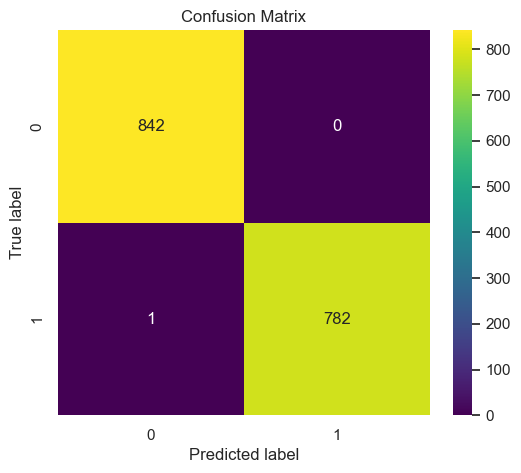

In [104]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix


lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train_enc, y_train)

y_pred = lr.predict(X_test_enc)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,
                                                           y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 使用 seaborn 繪製（風格漂亮）
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Accuracy: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
 [[842   0]
 [  0 783]]


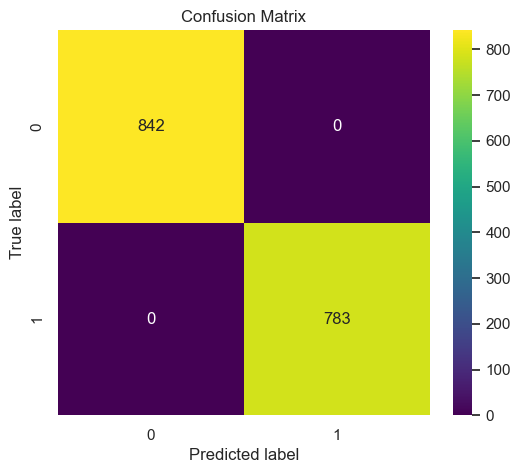

In [105]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, 
                            random_state=42)
rf.fit(X_train_enc, y_train)
y_pred_rf = rf.predict(X_test_enc)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, 
                                                        y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


# 🔹 混淆矩陣圖像
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### overfitting驗證
 ###### Step 1：訓練/測試落差 (Train vs Test Performance)
 ###### Step 2：K-fold 交叉驗證 (Cross Validation Gap)
 ###### Step 3：Learning Curve 學習曲線
 ###### Step 4：Validation Curve 超參數檢驗

In [106]:
# Step 1：訓練/測試落差 (Train vs Test Performance)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score

def train_test_check(model, Xtr, ytr, Xte, yte, name="model"):
    model.fit(Xtr, ytr)
    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)
    tr_acc, te_acc = accuracy_score(ytr, ytr_pred), accuracy_score(yte, yte_pred)
    tr_f1, te_f1 = f1_score(ytr, ytr_pred), f1_score(yte, yte_pred)
    yte_proba = model.predict_proba(Xte)[:,1] if hasattr(model, "predict_proba") else None
    auc = roc_auc_score(yte, yte_proba) if yte_proba is not None else None

    print(f"\n=== {name} ===")
    print(f"Train Acc {tr_acc:.4f} | F1 {tr_f1:.4f}")
    print(f"Test  Acc {te_acc:.4f} | F1 {te_f1:.4f} | AUC {auc:.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(yte, yte_pred))
    return tr_acc, te_acc

lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=300, random_state=42)

train_test_check(lr, X_train_enc, y_train, X_test_enc, y_test, "LogisticRegression")
train_test_check(rf, X_train_enc, y_train, X_test_enc, y_test, "RandomForest")



=== LogisticRegression ===
Train Acc 0.9998 | F1 0.9998
Test  Acc 0.9994 | F1 0.9994 | AUC 1.0000

Confusion Matrix:
 [[842   0]
 [  1 782]]

=== RandomForest ===
Train Acc 1.0000 | F1 1.0000
Test  Acc 1.0000 | F1 1.0000 | AUC 1.0000

Confusion Matrix:
 [[842   0]
 [  0 783]]


(1.0, 1.0)

In [107]:
# Step 2：K-fold 交叉驗證 (Cross Validation Gap)

from sklearn.model_selection import cross_validate, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_gap_check(model, X, y, name="model"):
    scores = cross_validate(
        model, X, y, cv=cv,
        scoring=["accuracy", "f1"],
        return_train_score=True, n_jobs=-1
    )
    print(f"\n=== {name} — 5-fold CV ===")
    print("Train Acc:", scores["train_accuracy"].mean().round(4))
    print("Test  Acc:", scores["test_accuracy"].mean().round(4))
    print("Gap Acc  :", (scores["train_accuracy"].mean()-scores["test_accuracy"].mean()).round(4))
    print("Train F1 :", scores["train_f1"].mean().round(4))
    print("Test  F1 :", scores["test_f1"].mean().round(4))
    print("Gap F1  :", (scores["train_f1"].mean()-scores["test_f1"].mean()).round(4))

cv_gap_check(LogisticRegression(max_iter=1000, random_state=42), X_train_enc, y_train, "LogisticRegression")
cv_gap_check(RandomForestClassifier(n_estimators=300, random_state=42), X_train_enc, y_train, "RandomForest")



=== LogisticRegression — 5-fold CV ===
Train Acc: 0.9999
Test  Acc: 0.9994
Gap Acc  : 0.0005
Train F1 : 0.9999
Test  F1 : 0.9994
Gap F1  : 0.0006

=== RandomForest — 5-fold CV ===
Train Acc: 1.0
Test  Acc: 1.0
Gap Acc  : 0.0
Train F1 : 1.0
Test  F1 : 1.0
Gap F1  : 0.0


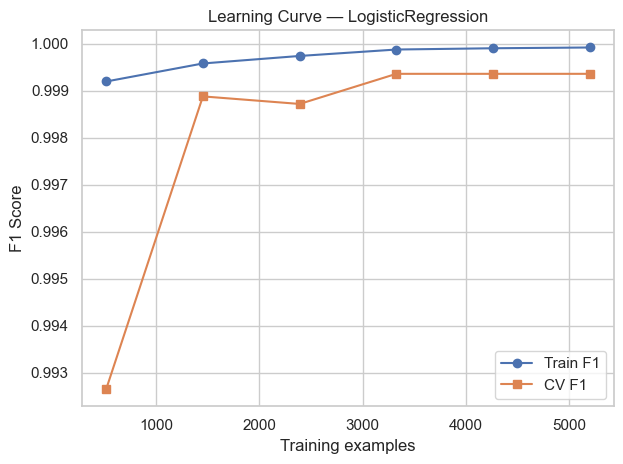

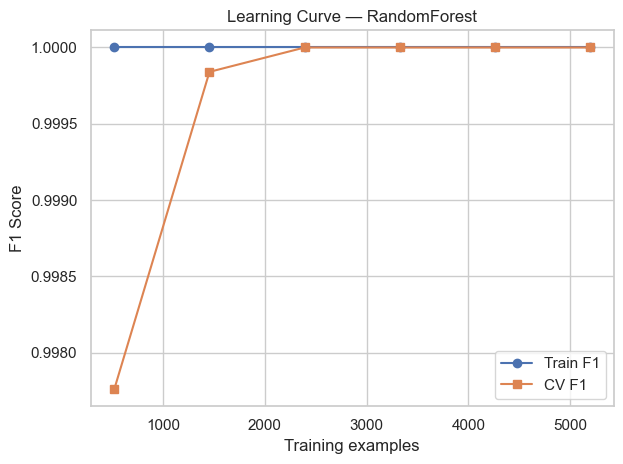

In [108]:
# Step 3：Learning Curve 學習曲線

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring="f1",
        n_jobs=-1, train_sizes=np.linspace(0.1,1.0,6),
        shuffle=True, random_state=42
    )
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train F1")
    plt.plot(train_sizes, test_scores.mean(axis=1),  's-', label="CV F1")
    plt.title(f"Learning Curve — {title}")
    plt.xlabel("Training examples"); plt.ylabel("F1 Score")
    plt.legend(); plt.tight_layout(); plt.show()

plot_learning_curve(LogisticRegression(max_iter=1000, random_state=42), X_train_enc, y_train, "LogisticRegression")
plot_learning_curve(RandomForestClassifier(n_estimators=300, random_state=42), X_train_enc, y_train, "RandomForest")


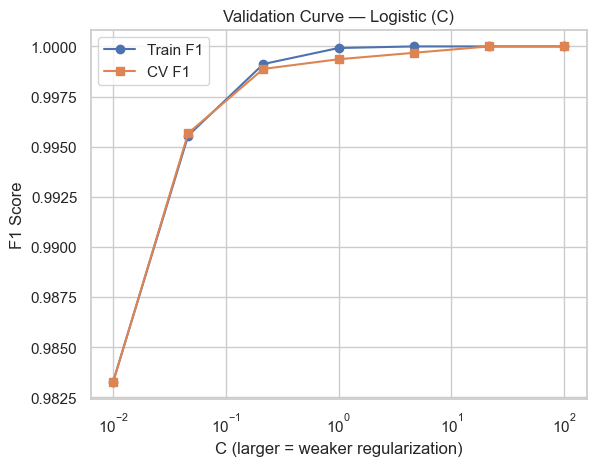

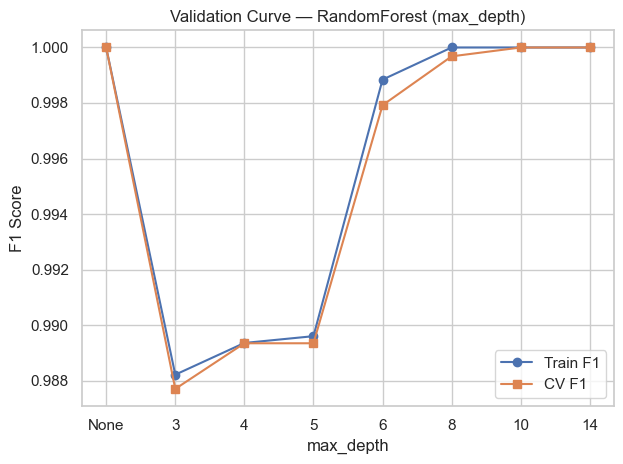

In [109]:
# Step 4：Validation Curve 超參數檢驗

from sklearn.model_selection import validation_curve
import numpy as np

# Logistic Regression — C 越大 正規化越弱
param_range_C = np.logspace(-2,2,7)
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=1000, random_state=42),
    X_train_enc, y_train, param_name="C", param_range=param_range_C,
    cv=cv, scoring="f1", n_jobs=-1
)
plt.semilogx(param_range_C, train_scores.mean(axis=1), 'o-', label="Train F1")
plt.semilogx(param_range_C, test_scores.mean(axis=1),  's-', label="CV F1")
plt.title("Validation Curve — Logistic (C)")
plt.xlabel("C (larger = weaker regularization)")
plt.ylabel("F1 Score"); plt.legend(); plt.show()

# Random Forest — max_depth 越大模型越複雜
param_range_depth = [None,3,4,5,6,8,10,14]
train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators=300, random_state=42),
    X_train_enc, y_train, param_name="max_depth",
    param_range=param_range_depth, cv=cv, scoring="f1", n_jobs=-1
)
x = np.arange(len(param_range_depth))
plt.plot(x, train_scores.mean(axis=1), 'o-', label="Train F1")
plt.plot(x, test_scores.mean(axis=1),  's-', label="CV F1")
plt.xticks(x,[str(v) for v in param_range_depth])
plt.title("Validation Curve — RandomForest (max_depth)")
plt.xlabel("max_depth"); plt.ylabel("F1 Score")
plt.legend(); plt.tight_layout(); plt.show()
